# BT4012 Project Group 22

## Bank Account Application Fraud

##### Prepared By: Lim Weizhe Jeff (A0238997B), Li Yinkang (A0234384A), Lee De Kai (A0233481J), Tan Wei Ming (A0234971Y), Zen Bin Xing Yiang (A0234171N)


## Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Loading


In [2]:
df = pd.read_csv('Base.csv')

# To view all columns
pd.set_option('display.max_columns', None)

df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,-1,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


Based on df.shape, there are 1000000 rows of data and 32 features.

In [3]:
summary = df.describe()

print(summary)

           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

### Dataset documentation


`Numeric`:

1. income (numeric): Annual income of the applicant (in decile form). Ranges between
   [0.1, 0.9].

2. name_email_similarity (numeric): Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].

3. prev_address_months_count (numeric): Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).

4. current_address_months_count (numeric): Months in currently registered address of the applicant. Ranges between [−1, 429] months (-1 is a missing value).

5. customer_age (numeric): Applicant’s age in years, rounded to the decade. Ranges between [10, 90] years.

6. days_since_request (numeric): Number of days passed since application was done. Ranges between [0, 79] days.

7. intended_balcon_amount (numeric): Initial transferred amount for application. Ranges between [−16, 114] (negatives are missing values).

8. zip_count_4w (numeric): Number of applications within same zip code in last 4 weeks. Ranges between [1, 6830].

9. velocity_6h (numeric): Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−175, 16818].

10. velocity_24h (numeric):Velocity of total applications made in last 24 hours i.e.,average number of applications per hour in the last 24 hours. Ranges between [1297, 9586]

11. velocity_4w (numeric): Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

12. bank_branch_count_8w (numeric): Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2404].

13. date_of_birth_distinct_emails_4w (numeric): Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 39].

14. credit_risk_score (numeric): Internal score of application risk. Ranges between [−191, 389].

15. bank_months_count (numeric): How old is previous account (if held) in months. Ranges between [−1, 32] months (-1 is a missing value).

16. proposed_credit_limit (numeric): Applicant’s proposed credit limit. Ranges between [200, 2000].

17. session_length_in_minutes (numeric): Length of user session in banking website in minutes. Ranges between [−1, 107] minutes (-1 is a missing value).

18. device_distinct_emails (numeric): Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [−1, 2] emails (-1 is a missing value).

19. device_fraud_count (numeric): Number of fraudulent applications with used device. Ranges between [0, 1].

20. month (numeric): Month where the application was made. Ranges between [0, 7].

`Categorical/Binary` - 5 Catgorical, 7 Binary:

1. fraud_bool (binary): If the application is fraudulent or not.

2. payment_type (categorical): Credit payment plan type. 5 possible (annonymized) values.

3. employment_status (categorical): Employment status of the applicant. 7 possible (annonymized) values.

4. email_is_free (binary): Domain of application email (either free or paid).

5. housing_status (categorical): Current residential status for applicant. 7 possible (annonymized) values.

6. phone_home_valid (binary): Validity of provided home phone.

7. phone_mobile_valid (binary): Validity of provided mobile phone.

8. has_other_cards (binary): If applicant has other cards from the same banking company.

9. foreign_request (binary): If origin country of request is different from bank’s country.

10. source (categorical): Online source of application. Either browser (INTERNET) or app (TELEAPP).

11. device_os (categorical): Operative system of device that made request. Possible values are: Windows, macOS, Linux, X11, or other.

12. keep_alive_session (binary): User option on session logout.


## Data Exploration and Analysis


#### We perform initial data exploration to understand its structure and characteristics through visualisations to identify patterns and outliers. 


### Visualising counts of fraud vs. non-fraud


Text(0, 0.5, 'Count')

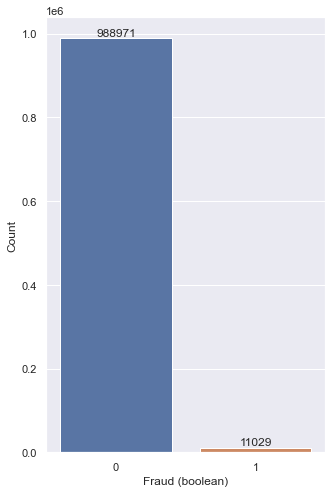

In [4]:
sns.set(rc={"figure.figsize":(5, 8)})

# Calculate fraud counts from the DataFrame
fraud_counts = df["fraud_bool"].value_counts()

# Create a bar plot using Seaborn
fraud_ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)

# Enhance bar plot with labeled counts
for bar, count in zip(fraud_ax.patches, fraud_counts):
    fraud_ax.annotate(count, 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      ha='center', va='bottom')

plt.xlabel("Fraud (boolean)")
plt.ylabel("Count")

We see that the dataset is severely imbalanced, with a count of 988971 : 11029 of non-fraud to fraud, or roughly 90:10.


# Annual Income of Applicant's Analysis 
###  Income vs Fraud 


In [5]:
# sns.set(rc={"figure.figsize":(10, 10)})

df_fraud = df[df["fraud_bool"] == 1]

# Group by income and calculate fraud counts
fraud_count_by_income_df = df_fraud.groupby("income").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_income_df['fraud_proportion'] = (fraud_count_by_income_df['fcount'] / fraud_count_by_income_df['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_income_df


,income,fcount,fraud_proportion
0,0.1,909,0.0824
1,0.2,438,0.0397
2,0.3,338,0.0306
3,0.4,597,0.0541
4,0.5,444,0.0403
5,0.6,983,0.0891
6,0.7,927,0.0841
7,0.8,1602,0.1453
8,0.9,4791,0.4344


In [6]:
df_nonfraud = df[df["fraud_bool"] == 0]

# Group by income and calculate non-fraud counts
nonfraud_count_by_income_df = df_nonfraud.groupby("income").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nonfraud_count_by_income_df['fraud_proportion'] = (nonfraud_count_by_income_df['fcount'] / nonfraud_count_by_income_df['fcount'].sum()).round(4)

# Display the DataFrame
nonfraud_count_by_income_df

,income,fcount,fraud_proportion
0,0.1,156540,0.1583
1,0.2,68907,0.0697
2,0.3,50495,0.0511
3,0.4,80767,0.0817
4,0.5,55414,0.0560
5,0.6,110990,0.1122
6,0.7,104182,0.1053
7,0.8,145048,0.1467
8,0.9,216628,0.2190


[Text(0.5, 1.0, 'Non-fraud counts by income')]

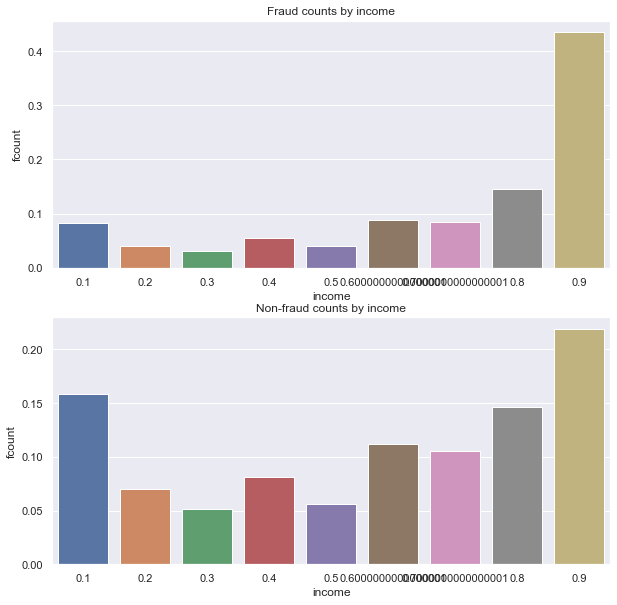

In [7]:
# # multi-plot comparing fraud vs. non-fraud

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(fraud_count_by_income_df["income"], fraud_count_by_income_df["fcount"]/sum(fraud_count_by_income_df["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by income")

sns.barplot(nonfraud_count_by_income_df["income"], nonfraud_count_by_income_df["fcount"]/sum(nonfraud_count_by_income_df["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by income")


Based on the visualisation, we could deduce that there is a higher proportion of fraud applicants with income class of 0.9. About 43% of fraud applicants have income class of 0.9 compared to 22% of non-fraud applicants with the same income class. Furthermore, we could also see that the proportion of non-fraud applicants with income class of 0.1 is significantly lower than the proportion of fraud applicants with the same income class. About 16% of non-fraud applicants have income class of 0.1 compared to 8% of fraud applicants with the same income class. 


[Text(0.5, 1.0, 'Fraud counts by income')]

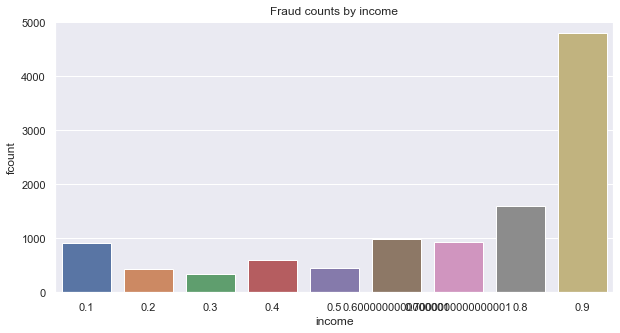

In [8]:
# multi-plot comparing fraud vs. non-fraud
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(fraud_count_by_income_df["income"], fraud_count_by_income_df["fcount"])
ax.set(title="Fraud counts by income")

Zooming into fraud applicants only, wwe can see that many fraud cases occurs for entries with (decile) income value of 0.8 and 0.9, with the counts of fraud for these two income groups exceeding 1000. In comparison, no other income group has a fraud count exceeding 1000. We may deduce that fraudster usually target higher income classes.


In [9]:
df.shape

(1000000, 32)

# Customer Age Analysis 
### Fraud vs Customer Age 


In [10]:
# Binning 
bins = [0, 19, 29, 39, 49, 59, 69, 79, np.inf]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69','70-79','80+']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels) # new column added to df

df_fraud = df[df["fraud_bool"] == 1]

# Group by age group and calculate fraud counts
fraud_count_by_age_grp = df_fraud.groupby("age_group").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_age_grp['fraud_proportion'] = (fraud_count_by_age_grp['fcount'] / fraud_count_by_age_grp['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_age_grp



,age_group,fcount,fraud_proportion
0,10-19,74,0.0067
1,20-29,1205,0.1093
2,30-39,2589,0.2347
3,40-49,2876,0.2608
4,50-59,2805,0.2543
5,60-69,1149,0.1042
6,70-79,263,0.0238
7,80+,68,0.0062


In [11]:
df_nonfraud = df[df["fraud_bool"] == 0]

# Group by age group and calculate non-fraud counts
nonfraud_count_by_age_grp = df_nonfraud.groupby("age_group").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nonfraud_count_by_age_grp['fraud_proportion'] = (nonfraud_count_by_age_grp['fcount'] / nonfraud_count_by_age_grp['fcount'].sum()).round(4)

# Display the DataFrame
nonfraud_count_by_age_grp

,age_group,fcount,fraud_proportion
0,10-19,20913,0.0211
1,20-29,244650,0.2474
2,30-39,308844,0.3123
3,40-49,235836,0.2385
4,50-59,137548,0.1391
5,60-69,33621,0.0340
6,70-79,6254,0.0063
7,80+,1305,0.0013


[Text(0.5, 1.0, 'Non-fraud counts by Age Group')]

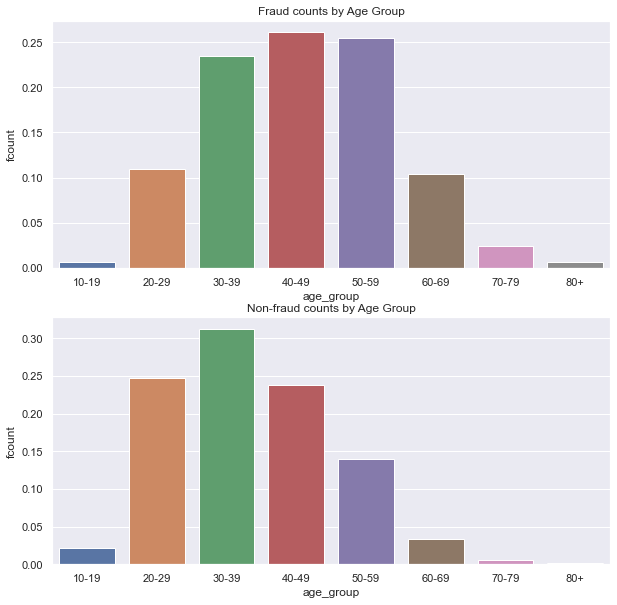

In [12]:
# # multi-plot comparing fraud vs. non-fraud

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(fraud_count_by_age_grp["age_group"], fraud_count_by_age_grp["fcount"]/sum(fraud_count_by_income_df["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Age Group")

sns.barplot(nonfraud_count_by_age_grp["age_group"], nonfraud_count_by_age_grp["fcount"]/sum(nonfraud_count_by_income_df["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Age Group")

The distribution for fraud applicants is somewhat normally distributed. However, the distribution for non-fraud applicants seem to be positively skewed. 
For example, about 80% of the non-fraud applicants have age between 20 to 49 compared to 59% of the fraud applicants with the same age range. Furthermore, we could deduce that fraudsters target older age (age 40 and above) who might not be tech-savvy or aware that they have been targeted with fraud. This is because 63% of the fraud applicants are age 40 and older, this is compared to 39% of non-fraud applicants who are of the same age range. 

# Credit Risk Score Analysis 
### Visualising counts of fraud against credit risk score


[Text(0.5, 1.0, 'Non-fraud counts of Non Fraud Applicants')]

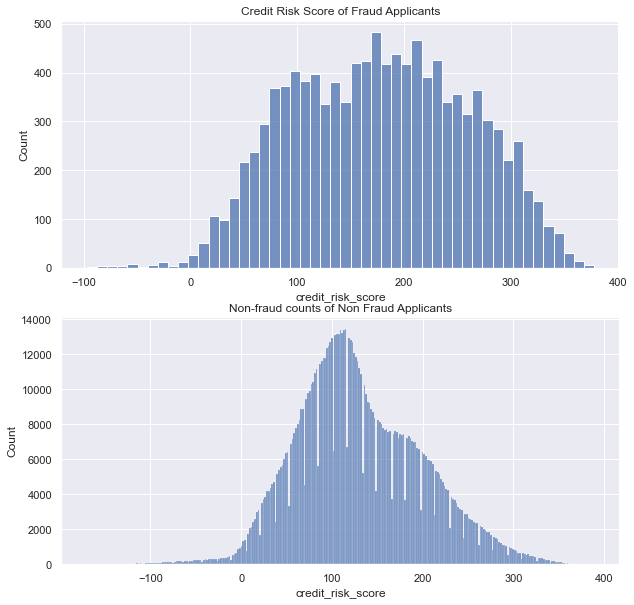

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
sns.histplot(df_fraud, x="credit_risk_score", bins=50, ax = ax1)
ax1.set(title="Credit Risk Score of Fraud Applicants")

sns.histplot(df_nonfraud, x ="credit_risk_score", ax=ax2)
ax2.set(title="Non-fraud counts of Non Fraud Applicants")

From the histogrm, we could deduce that the credit risk score for non-fraud applicants is much lower than the fraud applicants. 

In [14]:
df.shape

(1000000, 33)

# Days Since Request Analysis 
### Fraud vs days_since_request 

In [15]:
# Binning 
bins = [0, 9, 19, 29, 39, 49, 59, 69, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59','60-69','70+']
df['daysrequestbin'] = pd.cut(df['days_since_request'], bins=bins, labels=labels) # new column added to df

df_fraud = df[df["fraud_bool"] == 1]

# Group by daysrequestbin and calculate fraud counts
fraud_count_by_daysrequest = df_fraud.groupby("daysrequestbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_daysrequest['fraud_proportion'] = (fraud_count_by_daysrequest['fcount'] / fraud_count_by_daysrequest['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_daysrequest


,daysrequestbin,fcount,fraud_proportion
0,0-9,10654,0.9660
1,10-19,200,0.0181
2,20-29,109,0.0099
3,30-39,18,0.0016
4,40-49,0,0.0000
5,50-59,0,0.0000
6,60-69,3,0.0003
7,70+,45,0.0041


In [16]:
df_nonfraud = df[df["fraud_bool"] == 0]

# Group by daysrequestbin and calculate non-fraud counts
nonfraud_count_by_daysrequest = df_nonfraud.groupby("daysrequestbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nonfraud_count_by_daysrequest['fraud_proportion'] = (nonfraud_count_by_daysrequest['fcount'] / nonfraud_count_by_daysrequest['fcount'].sum()).round(4)

# Display the DataFrame
nonfraud_count_by_daysrequest


,daysrequestbin,fcount,fraud_proportion
0,0-9,952051,0.9627
1,10-19,22738,0.0230
2,20-29,9463,0.0096
3,30-39,1050,0.0011
4,40-49,1,0.0000
5,50-59,0,0.0000
6,60-69,713,0.0007
7,70+,2955,0.0030


[Text(0.5, 1.0, 'Non-fraud counts by Days Request')]

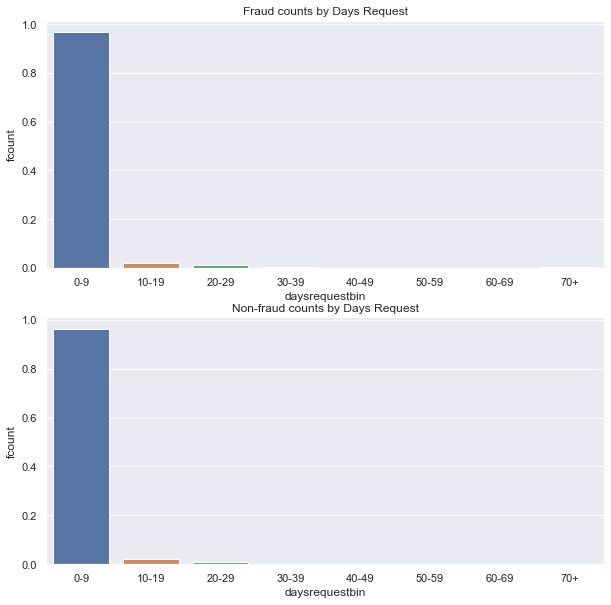

In [17]:
# # multi-plot comparing fraud vs. non-fraud

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(fraud_count_by_daysrequest["daysrequestbin"], fraud_count_by_daysrequest["fcount"]/sum(fraud_count_by_daysrequest["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Days Request")

sns.barplot(nonfraud_count_by_daysrequest["daysrequestbin"], nonfraud_count_by_daysrequest["fcount"]/sum(nonfraud_count_by_daysrequest["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Days Request")

From the barchart, we deduce that there is no difference in proportion of days request for both non fraud and fraud applicants. Therefore, we should explore other variables such as intended_balcon_amount or session_length_in_minutes to see if there's any valuable insights. 

In [18]:
df.shape

(1000000, 34)

# Initial Balance Analysis 
### Fruad vs intended_balcon_amount

In [19]:
# Binning 
dfwval = df[df['intended_balcon_amount'] >= 0]

bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59','60-69','70-79','80-89','90-99','100+']
dfwval['intendedbalbin'] = pd.cut(dfwval['intended_balcon_amount'], bins=bins, labels=labels)

df_fraud = dfwval[dfwval["fraud_bool"] == 1]

# Group by intendedbalbin and calculate fraud counts
fraud_count_by_balbin = df_fraud.groupby("intendedbalbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_balbin['fraud_proportion'] = (fraud_count_by_balbin['fcount'] / fraud_count_by_balbin['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_balbin


,intendedbalbin,fcount,fraud_proportion
0,0-9,70,0.0546
1,10-19,174,0.1357
2,20-29,257,0.2005
3,30-39,217,0.1693
4,40-49,140,0.1092
5,50-59,240,0.1872
6,60-69,0,0.0000
7,70-79,0,0.0000
8,80-89,0,0.0000
9,90-99,65,0.0507


In [20]:
df_nonfraud = dfwval[dfwval["fraud_bool"] == 0]

# Group by intendedbalbin and calculate non-fraud counts
nonfraud_count_by_balbin = df_nonfraud.groupby("intendedbalbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nonfraud_count_by_balbin['fraud_proportion'] = (nonfraud_count_by_balbin['fcount'] / nonfraud_count_by_balbin['fcount'].sum()).round(4)

# Display the DataFrame
nonfraud_count_by_balbin


,intendedbalbin,fcount,fraud_proportion
0,0-9,16597,0.0648
1,10-19,40120,0.1566
2,20-29,54399,0.2123
3,30-39,43318,0.1691
4,40-49,29229,0.1141
5,50-59,53730,0.2097
6,60-69,26,0.0001
7,70-79,0,0.0000
8,80-89,6,0.0000
9,90-99,5852,0.0228


[Text(0.5, 1.0, 'Non-fraud counts by Initial Balance')]

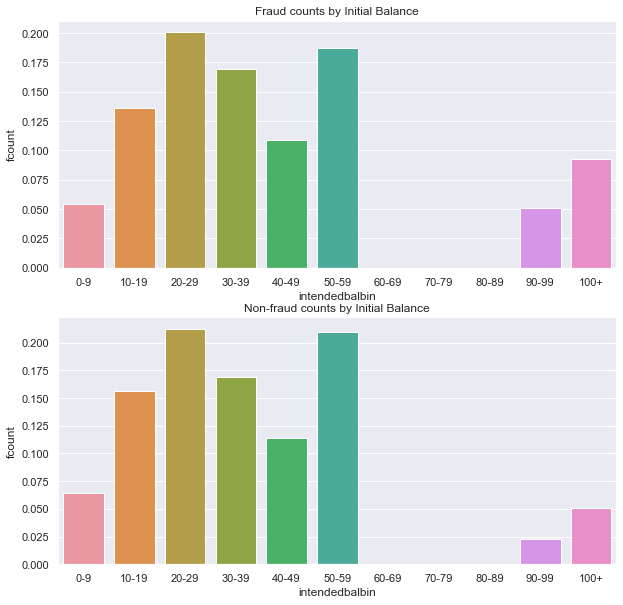

In [21]:
# # multi-plot comparing fraud vs. non-fraud

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(fraud_count_by_balbin["intendedbalbin"], fraud_count_by_balbin["fcount"]/sum(fraud_count_by_balbin["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Initial Balance")

sns.barplot(nonfraud_count_by_balbin["intendedbalbin"], nonfraud_count_by_balbin["fcount"]/sum(nonfraud_count_by_balbin["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Initial Balance")

From the visusalisation, we could see that there is a significant increase in proportion of fraud applicants depositing more than $90 compared to their counterpart. For example, 14% of fraud applicants deposited more than $90 compared to about 7% of non-fraud applicants. We believe that in order not to get detected easily, fraudsters deposit more money to make bank application looks more legitimate. 


In [22]:
df.shape

(1000000, 34)

# Session Length in Minutes Analysis
### Fruad vs session_length_in_minutes 

In [23]:
# Create the bins and labels for session length
bins = [0, 5, 9, 14, 19, 29, 39, 49, 59, 69, 79, 89, 99]  # Removed np.inf from the bins
labels = ['0-5', '6-9', '10-14', '15-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create a new column to store the session length bins
df['sessionlengthbin'] = pd.cut(df['session_length_in_minutes'], bins=bins, labels=labels)

# Filter the DataFrame to include only rows with 'session_length_in_minutes' >= 0
dfwval = df[df['session_length_in_minutes'] >= 0]

# Filter the fraud data
df_fraud = dfwval[dfwval["fraud_bool"] == 1]

# Group by sessionlengthbin and calculate fraud counts
fraud_count_by_sessionlength = df_fraud.groupby("sessionlengthbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_sessionlength['fraud_proportion'] = (fraud_count_by_sessionlength['fcount'] / fraud_count_by_sessionlength['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_sessionlength



,sessionlengthbin,fcount,fraud_proportion
0,0-5,5347,0.4856
1,6-9,3084,0.2801
2,10-14,1101,0.1000
3,15-19,466,0.0423
4,20-29,460,0.0418
5,30-39,247,0.0224
6,40-49,147,0.0134
7,50-59,115,0.0104
8,60-69,36,0.0033
9,70-79,8,0.0007


In [24]:
df['sessionlengthbin'] = pd.cut(df['session_length_in_minutes'], bins=bins, labels=labels) # new column added to df

df_nonfraud = dfwval[dfwval["fraud_bool"] == 0]
# Group by sessionlengthbin and calculate non-fraud counts
nonfraud_count_by_sessionlength = df_nonfraud.groupby("sessionlengthbin").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nonfraud_count_by_sessionlength['fraud_proportion'] = (nonfraud_count_by_sessionlength['fcount'] / nonfraud_count_by_sessionlength['fcount'].sum()).round(4)

# Display the DataFrame
nonfraud_count_by_sessionlength


,sessionlengthbin,fcount,fraud_proportion
0,0-5,479373,0.4857
1,6-9,265638,0.2691
2,10-14,122663,0.1243
3,15-19,54790,0.0555
4,20-29,37200,0.0377
5,30-39,13120,0.0133
6,40-49,6986,0.0071
7,50-59,4448,0.0045
8,60-69,2238,0.0023
9,70-79,493,0.0005


[Text(0.5, 1.0, 'Non-fraud counts by Session Length')]

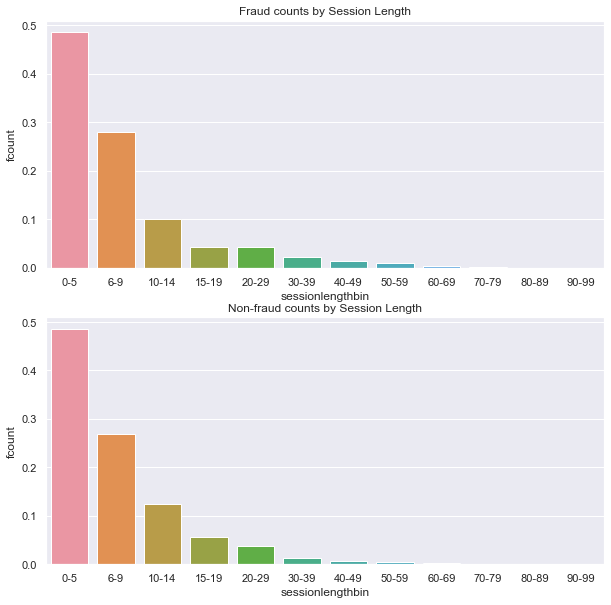

In [25]:
## multi-plot comparing fraud vs. non-fraud
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(fraud_count_by_sessionlength["sessionlengthbin"], fraud_count_by_sessionlength["fcount"]/sum(fraud_count_by_sessionlength["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Session Length")

sns.barplot(nonfraud_count_by_sessionlength["sessionlengthbin"], nonfraud_count_by_sessionlength["fcount"]/sum(nonfraud_count_by_sessionlength["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Session Length")

We have further split the bins for 0 mins to 20 mins as they have a higher proportion for both fraud and non-fraud applicants. 

From the side by side bar plot, we could deduce that the proportion between fraud and non-fraud for session length is about the same. However, we could see that there is about 17% of non-fraud applicants spending 10-20 mins on their online banking compared to about just 14% of fraud applicants. 


In [26]:
df.shape

(1000000, 35)

# Device Fraud Count Analysis 
### Fraud vs Device_Fraud_Count

In [27]:
df_fraud = df[df["fraud_bool"] == 1]
df_nonfraud = df[df["fraud_bool"] == 0]

fraud_count_device_fraud_count = df_fraud.groupby("device_fraud_count").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
fraud_count_device_fraud_count

,device_fraud_count,fcount
0,0,11029


In [28]:
non_fraud_count_device_fraud_count = df_nonfraud.groupby("device_fraud_count").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
non_fraud_count_device_fraud_count

,device_fraud_count,fcount
0,0,988971


From the two dataframes, we can deduce that all bank applicants (inclusive of fraud applicants) have 0 fraudulent applicants with used device. 


# Free Email Domain Analysis 

### Fraud vs email_is_free

In [29]:
# Group by email_is_free and calculate fraud counts
fraud_count_by_emailfree = df_fraud.groupby("email_is_free").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_emailfree['fraud_proportion'] = (fraud_count_by_emailfree['fcount'] / fraud_count_by_emailfree['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_emailfree

,email_is_free,fcount,fraud_proportion
0,0,3738,0.3389
1,1,7291,0.6611


In [30]:
# Group by email_is_free and calculate non-fraud counts
nofraud_count_by_emailfree = df_nonfraud.groupby("email_is_free").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_emailfree['fraud_proportion'] = (nofraud_count_by_emailfree['fcount'] / nofraud_count_by_emailfree['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_emailfree


,email_is_free,fcount,fraud_proportion
0,0,466376,0.4716
1,1,522595,0.5284


[Text(0.5, 1.0, 'Non-fraud counts by email_is_free')]

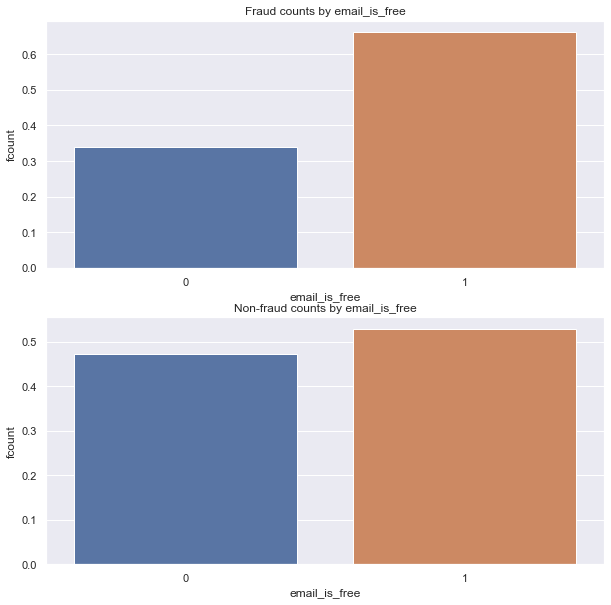

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
fraud_count_by_email_is_free = df_fraud.groupby("email_is_free").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_by_email_is_free = df_nonfraud.groupby("email_is_free").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
sns.barplot(fraud_count_by_email_is_free["email_is_free"], fraud_count_by_email_is_free["fcount"]/sum(fraud_count_by_email_is_free["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by email_is_free")

sns.barplot(nofraud_count_by_email_is_free["email_is_free"], nofraud_count_by_email_is_free["fcount"]/sum(nofraud_count_by_email_is_free["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by email_is_free")


From the barplot, it is not surprising that there are greater proportion of free domain email used by fraud applicants. 66% of fraud applicants use free email and this is compared to 53% of non-fraud applicants using free email. 


# Valid Phone and Home  Analysis 
### Fraud vs phone_mobile_valid and Fraud vs phone_home_valid

In [32]:
# Group by phone_mobile_valid and calculate fraud counts
fraud_count_by_phone_mobile_valid = df_fraud.groupby("phone_mobile_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_phone_mobile_valid['fraud_proportion'] = (fraud_count_by_phone_mobile_valid['fcount'] / fraud_count_by_phone_mobile_valid['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_phone_mobile_valid


,phone_mobile_valid,fcount,fraud_proportion
0,0,1648,0.1494
1,1,9381,0.8506


In [33]:
# Group by phone_mobile_valid and calculate non-fraud counts
nofraud_count_by_phone_mobile_valid = df_nonfraud.groupby("phone_mobile_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_phone_mobile_valid['fraud_proportion'] = (nofraud_count_by_phone_mobile_valid['fcount'] / nofraud_count_by_phone_mobile_valid['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_phone_mobile_valid


,phone_mobile_valid,fcount,fraud_proportion
0,0,108676,0.1099
1,1,880295,0.8901


In [34]:
# Group by phone_home_valid and calculate fraud counts
fraud_count_by_phone_home_valid = df_fraud.groupby("phone_home_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_phone_home_valid['fraud_proportion'] = (fraud_count_by_phone_home_valid['fcount'] / fraud_count_by_phone_home_valid['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_phone_home_valid


,phone_home_valid,fcount,fraud_proportion
0,0,8238,0.7469
1,1,2791,0.2531


In [35]:
# Group by phone_home_valid and calculate non-fraud counts
nofraud_count_by_phone_home_valid = df_nonfraud.groupby("phone_home_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_phone_home_valid['fraud_proportion'] = (nofraud_count_by_phone_home_valid['fcount'] / nofraud_count_by_phone_home_valid['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_phone_home_valid


,phone_home_valid,fcount,fraud_proportion
0,0,574685,0.5811
1,1,414286,0.4189


[Text(0.5, 1.0, 'Non-fraud counts by home valid')]

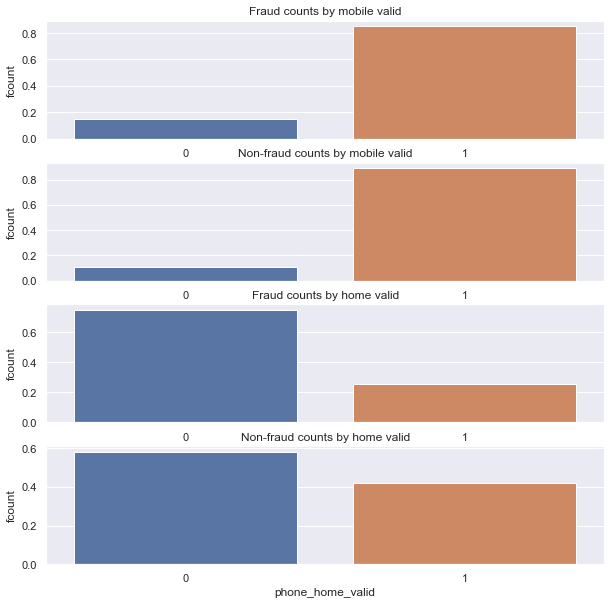

In [36]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 1, figsize = (10, 10))
fraud_count_by_phone_mobile_valid = df_fraud.groupby("phone_mobile_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_by_phone_mobile_valid= df_nonfraud.groupby("phone_mobile_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()

fraud_count_by_home_mobile_valid = df_fraud.groupby("phone_home_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_by_homee_mobile_valid= df_nonfraud.groupby("phone_home_valid").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()


sns.barplot(fraud_count_by_phone_mobile_valid["phone_mobile_valid"], fraud_count_by_phone_mobile_valid["fcount"]/sum(fraud_count_by_phone_mobile_valid["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by mobile valid")

sns.barplot(nofraud_count_by_phone_mobile_valid["phone_mobile_valid"], nofraud_count_by_phone_mobile_valid["fcount"]/sum(nofraud_count_by_phone_mobile_valid["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by mobile valid")

sns.barplot(fraud_count_by_home_mobile_valid["phone_home_valid"], fraud_count_by_home_mobile_valid["fcount"]/sum(fraud_count_by_home_mobile_valid["fcount"]), ax=ax3)
ax3.set(title="Fraud counts by home valid")

sns.barplot(nofraud_count_by_homee_mobile_valid["phone_home_valid"], nofraud_count_by_homee_mobile_valid["fcount"]/sum(nofraud_count_by_homee_mobile_valid["fcount"]), ax=ax4)
ax4.set(title="Non-fraud counts by home valid")


There is no significant difference in the proportion of fraud and non-fraud applicants when analysing valid mobile, though there is slightly more non-fraud applicants (89%) using valid mobile compared to fraud applicants. This is in line of our expectation that fraudsters will less likely use valid mobile for applications. 

However, when we analyse home mobile, we could see that there are more applicants who do not use a valid home number. Furthermore, if we drill down to non-fraud and fraud applicants, we could see that there are more fraud applicants (72% fraud vs 56% non fraud) using invalid home number for bank applicants. This is in line with our expectations that fraudsters will more likely use invalid home number for applications.

In [37]:
df.shape

(1000000, 35)

# Other cards with banks analysis
### Fraud vs has_other_cards 

In [38]:
# Group by has_other_cards and calculate fraud counts
fraud_count_by_has_other_cards = df_fraud.groupby("has_other_cards").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_has_other_cards['fraud_proportion'] = (fraud_count_by_has_other_cards['fcount'] / fraud_count_by_has_other_cards['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_has_other_cards


,has_other_cards,fcount,fraud_proportion
0,0,10098,0.9156
1,1,931,0.0844


In [39]:
# Group by has_other_cards and calculate non-fraud counts
nofraud_count_by_has_other_cards = df_nonfraud.groupby("has_other_cards").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_has_other_cards['fraud_proportion'] = (nofraud_count_by_has_other_cards['fcount'] / nofraud_count_by_has_other_cards['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_has_other_cards


,has_other_cards,fcount,fraud_proportion
0,0,766914,0.7755
1,1,222057,0.2245


[Text(0.5, 1.0, 'Non-fraud counts by has other cards')]

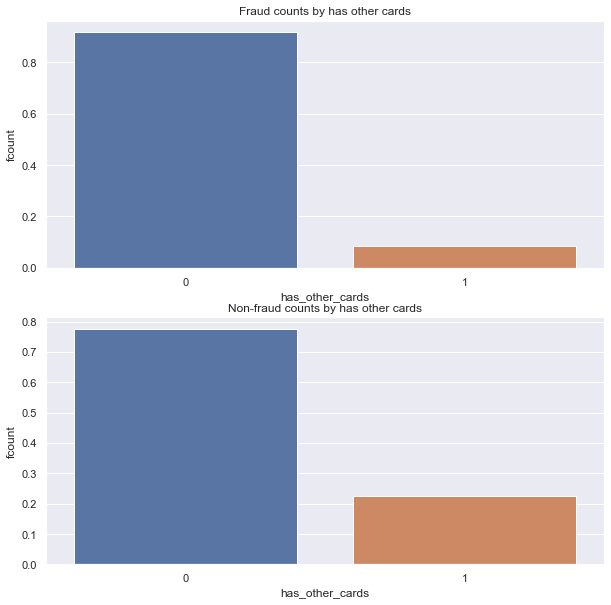

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
fraud_count_by_phone_has_other_cards = df_fraud.groupby("has_other_cards").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_by_phone_has_other_cards= df_nonfraud.groupby("has_other_cards").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()

sns.barplot(fraud_count_by_phone_has_other_cards["has_other_cards"], fraud_count_by_phone_has_other_cards["fcount"]/sum(fraud_count_by_phone_has_other_cards["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by has other cards")

sns.barplot(nofraud_count_by_phone_has_other_cards["has_other_cards"], nofraud_count_by_phone_has_other_cards["fcount"]/sum(nofraud_count_by_phone_has_other_cards["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by has other cards")


From the bar plots, we could deduce that there is higher proportion of fraud applicants (91.45%) without any other cards with the bank compared to non-fraud applicants (76.25%) without any other cards with the bank. 

# Name Similarity Analysis 
### Fraud vs Name Email Similarity

[Text(0.5, 1.0, 'Non Fraud counts by name email similarity')]

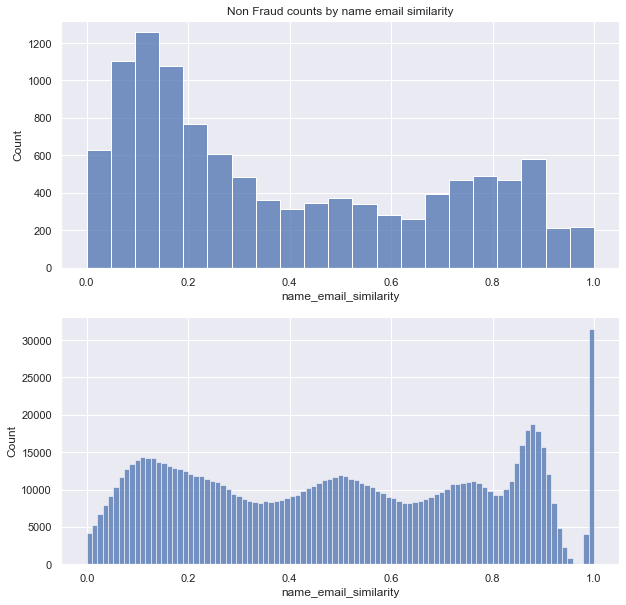

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
sns.histplot(data=df_fraud, x ="name_email_similarity", ax= ax1)
ax1.set(title="Fraud counts by name email similarity")
sns.histplot(data=df_nonfraud, x ="name_email_similarity", ax = ax2)
ax1.set(title="Non Fraud counts by name email similarity")


From the histogram plot, we could deduce that there are higher proportions of fraudsters using low email similarity to prevent getting detected. This is in line with our expectation.

### Fraud vs Employment Status

In [42]:
# Group by employment_status and calculate fraud counts
fraud_count_by_employmentstatus = df_fraud.groupby("employment_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_employmentstatus['fraud_proportion'] = (fraud_count_by_employmentstatus['fcount'] / fraud_count_by_employmentstatus['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_employmentstatus


,employment_status,fcount,fraud_proportion
0,CA,8899,0.8069
1,CB,953,0.0864
2,CC,932,0.0845
3,CD,100,0.0091
4,CE,53,0.0048
5,CF,85,0.0077
6,CG,7,0.0006


In [43]:
# Group by employment_status and calculate non-fraud counts
nofraud_count_by_employmentstatus = df_nonfraud.groupby("employment_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_employmentstatus['fraud_proportion'] = (nofraud_count_by_employmentstatus['fcount'] / nofraud_count_by_employmentstatus['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_employmentstatus

,employment_status,fcount,fraud_proportion
0,CA,721353,0.7294
1,CB,137335,0.1389
2,CC,36826,0.0372
3,CD,26422,0.0267
4,CE,22640,0.0229
5,CF,43949,0.0444
6,CG,446,0.0005


[Text(0.5, 1.0, 'Non-fraud counts by Employment Status')]

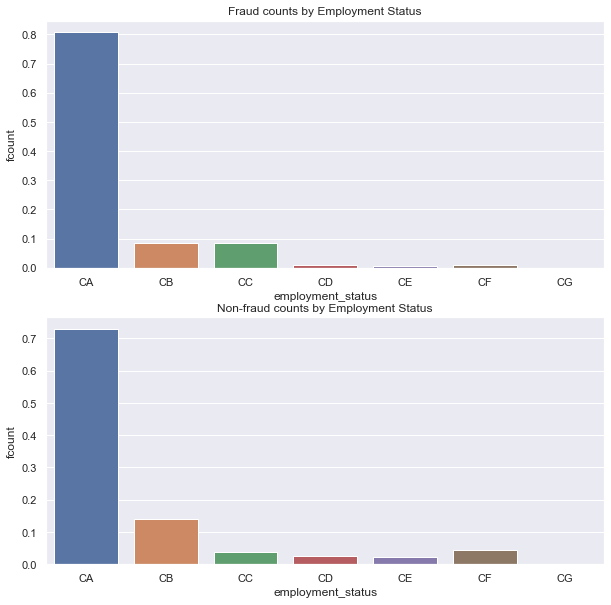

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

fraud_count_employment = df_fraud.groupby("employment_status").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_by_employment = df_nonfraud.groupby("employment_status").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()

sns.barplot(fraud_count_employment["employment_status"], fraud_count_employment["fcount"]/sum(fraud_count_employment["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Employment Status")

sns.barplot(nofraud_count_by_employment["employment_status"], nofraud_count_by_employment["fcount"]/sum(nofraud_count_by_employment["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Employment Status")

We notice that the proportion of non-fraud applicants who have employment status of CB, CD, CE, CF are higher compared to the proportion of fraud aplicants with the same employment status. 

Furthermore, the proportion of fraud applications whose employment status is CA and CC, is higher compared to the non-fraud applicants with the same employment status. 

### Fraud vs Housing Status

In [45]:
# Group by housing_status and calculate fraud counts
fraud_count_by_housingstatus = df_fraud.groupby("housing_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_housingstatus['fraud_proportion'] = (fraud_count_by_housingstatus['fcount'] / fraud_count_by_housingstatus['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_housingstatus


,housing_status,fcount,fraud_proportion
0,BA,6357,0.5764
1,BB,1568,0.1422
2,BC,2288,0.2075
3,BD,226,0.0205
4,BE,582,0.0528
5,BF,7,0.0006
6,BG,1,0.0001


In [46]:
# Group by housing_status and calculate non-fraud counts
nofraud_count_by_housingstatus = df_nonfraud.groupby("housing_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_housingstatus['fraud_proportion'] = (nofraud_count_by_housingstatus['fcount'] / nofraud_count_by_housingstatus['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_housingstatus


,housing_status,fcount,fraud_proportion
0,BA,163318,0.1651
1,BB,259397,0.2623
2,BC,369855,0.3740
3,BD,25935,0.0262
4,BE,168553,0.1704
5,BF,1662,0.0017
6,BG,251,0.0003


[Text(0.5, 1.0, 'Non-fraud counts by Employment Status')]

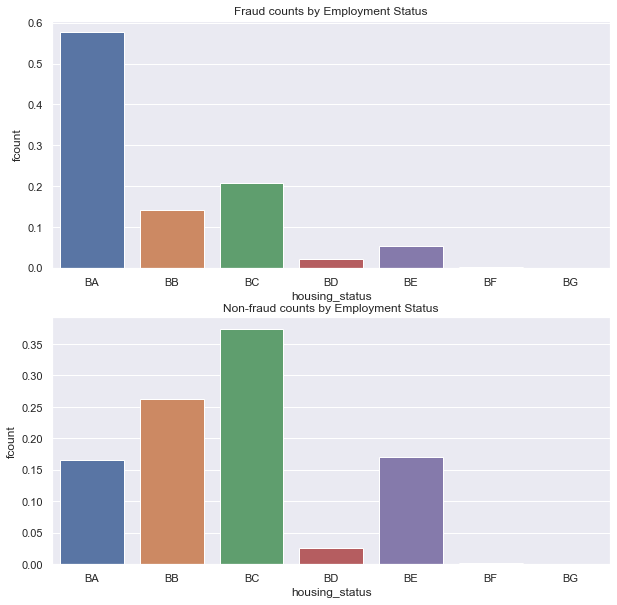

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
df_fraud = df[df['fraud_bool'] == 1]
df_nonfraud = df[df['fraud_bool'] == 0]

# Group by housing_status and calculate fraud counts for fraud cases
fraud_count_housing_status = df_fraud.groupby("housing_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Group by housing_status and calculate non-fraud counts
nofraud_count_by_housing_status = df_nonfraud.groupby("housing_status").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()


sns.barplot(fraud_count_housing_status["housing_status"], fraud_count_housing_status["fcount"]/sum(fraud_count_housing_status["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Employment Status")

sns.barplot(nofraud_count_by_housing_status["housing_status"], nofraud_count_by_housing_status["fcount"]/sum(nofraud_count_by_housing_status["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Employment Status")

From the barplot above, we notice that majority of the fraud applicants have housing status of BA (56%), while majority of the non-fraud applicants have housing status of BC (37%). 

Furthermore, we also noticed that the proportion of non-fraud applicants who have housing status of BB, BC, BD, BE are higher compared to the proportion of fraud applicants of the same housing status.

### Visualising counts of fraud against payment type


In [48]:
# Group by payment_type and calculate fraud counts
fraud_count_by_payment_type_df = df_fraud.groupby("payment_type").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_payment_type_df['fraud_proportion'] = (fraud_count_by_payment_type_df['fcount'] / fraud_count_by_payment_type_df['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_payment_type_df


,payment_type,fcount,fraud_proportion
0,AA,1364,0.1237
1,AB,4169,0.3780
2,AC,4209,0.3816
3,AD,1286,0.1166
4,AE,1,0.0001


In [49]:
# Group by payment_type and calculate non-fraud counts
nofraud_count_by_payment_type_df = df_nonfraud.groupby("payment_type").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_payment_type_df['fraud_proportion'] = (nofraud_count_by_payment_type_df['fcount'] / nofraud_count_by_payment_type_df['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_payment_type_df


,payment_type,fcount,fraud_proportion
0,AA,256885,0.2597
1,AB,366385,0.3705
2,AC,247862,0.2506
3,AD,117551,0.1189
4,AE,288,0.0003


[Text(0.5, 1.0, 'Non-fraud counts by Payment Type')]

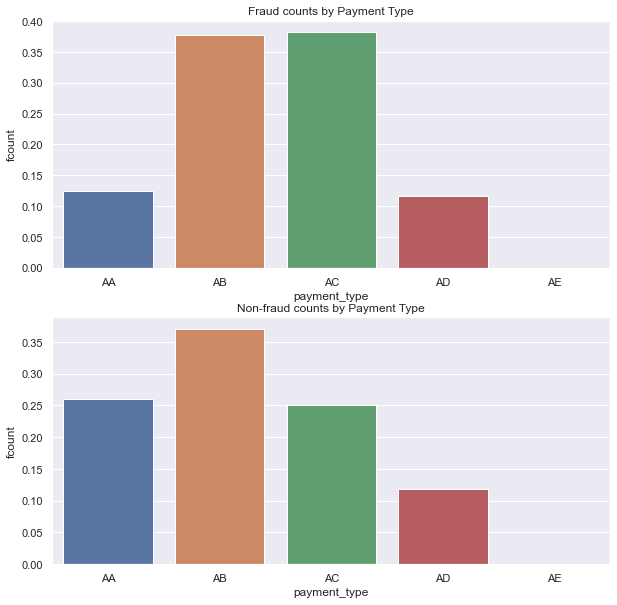

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
# Group by payment_type and calculate fraud counts for fraud cases
fraud_count_payment_type = df_fraud.groupby("payment_type").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Group by payment_type and calculate non-fraud counts
nofraud_count_payment_type = df_nonfraud.groupby("payment_type").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

sns.barplot(fraud_count_payment_type["payment_type"], fraud_count_payment_type["fcount"]/sum(fraud_count_payment_type["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Payment Type")

sns.barplot(nofraud_count_payment_type["payment_type"], nofraud_count_payment_type["fcount"]/sum(nofraud_count_payment_type["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Payment Type")

From the barplots, we could deduce that the proportion of fraud applicants whose payment type is AB and AD is higher than the proportion of non-fraud applicants while the proportion of non-fraud applicants whose payment type is AA is higher than the proportion of fraud applicants. 

Out of all fraud cases, we see that payment types "AB" and "AC" are very similar at around 4200, while the payment types "AA" and "AD" are also similar to each other at a lower value of around 1300. The last payment type "AE" only has one instance of fraud.


### Visualising counts of fraud against month


In [51]:
# Group by month and calculate fraud counts
fraud_count_by_month_df = df_fraud.groupby("month").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate fraud proportion
fraud_count_by_month_df['fraud_proportion'] = (fraud_count_by_month_df['fcount'] / fraud_count_by_month_df['fcount'].sum()).round(4)

# Display the DataFrame
fraud_count_by_month_df


,month,fcount,fraud_proportion
0,0,1500,0.1360
1,1,1198,0.1086
2,2,1198,0.1086
3,3,1392,0.1262
4,4,1452,0.1317
5,5,1411,0.1279
6,6,1450,0.1315
7,7,1428,0.1295


In [52]:
# Group by month and calculate non-fraud counts
nofraud_count_by_month_df = df_nonfraud.groupby("month").count()[["fraud_bool"]].rename(columns={"fraud_bool": "fcount"}).reset_index()

# Calculate non-fraud proportion
nofraud_count_by_month_df['fraud_proportion'] = (nofraud_count_by_month_df['fcount'] / nofraud_count_by_month_df['fcount'].sum()).round(4)

# Display the DataFrame
nofraud_count_by_month_df


,month,fcount,fraud_proportion
0,0,130940,0.1324
1,1,126422,0.1278
2,2,135781,0.1373
3,3,149544,0.1512
4,4,126239,0.1276
5,5,117912,0.1192
6,6,106718,0.1079
7,7,95415,0.0965


[Text(0.5, 1.0, 'Non-fraud counts by Month')]

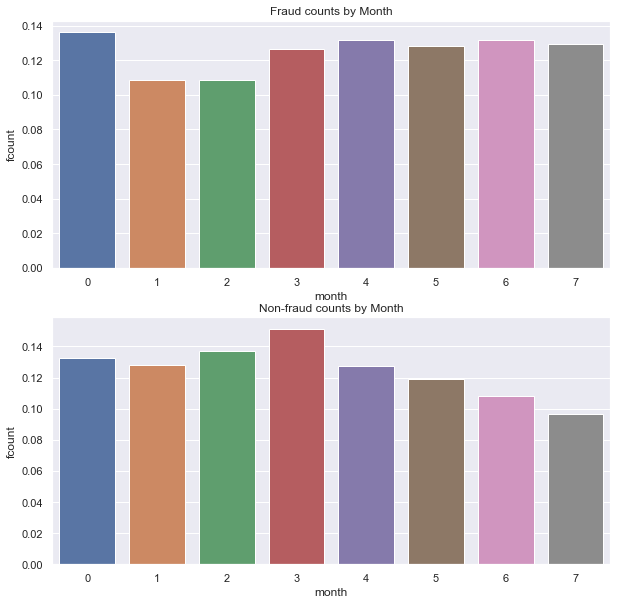

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
fraud_count_month = df_fraud.groupby("month").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()
nofraud_count_month = df_nonfraud.groupby("month").count()[["fraud_bool"]].rename(columns={"fraud_bool" : "fcount"}).reset_index()

sns.barplot(fraud_count_month["month"], fraud_count_month["fcount"]/sum(fraud_count_month["fcount"]), ax=ax1)
ax1.set(title="Fraud counts by Month")

sns.barplot(nofraud_count_month["month"], nofraud_count_month["fcount"]/sum(nofraud_count_month["fcount"]), ax=ax2)
ax2.set(title="Non-fraud counts by Month")

From the bar plot, we could deduce that there is higher proportion of non-fraud applicants opened in the Month 3 (15%) compared to fraud applicants. Furthermore, we could also see that there are higher proportion of fraud applicants (39%) opening accounts in Month 5, 6, 7 compared to 31% of non-fraud applicants. 


In [54]:
df.shape

(1000000, 35)

--------------------------------------

# **Data Preparation & Transformation**

### <u>Handling duplicate rows</u>


In [55]:
df = pd.read_csv('Base.csv')
# To view all columns
pd.set_option('display.max_columns', None)

In [56]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


### <u>Data Cleaning</u>

##### Handling Missing Values


In [57]:
print("Columns with missing values:")

cols_with_missing_vals = [
    "prev_address_months_count", "current_address_months_count", "intended_balcon_amount",
    "bank_months_count", "session_length_in_minutes", "device_distinct_emails_8w"
] # these features were identified in the dataset documentation to have missing data, indicated by a negative value

for col in cols_with_missing_vals:
    num_missing = df[df[col] < 0].shape[0]
    if num_missing > 0:
        print(f"`{col}`: {num_missing} ({round(num_missing/df.shape[0], 4)})")

Columns with missing values:
`prev_address_months_count`: 712920 (0.7129)
`current_address_months_count`: 4254 (0.0043)
`intended_balcon_amount`: 742523 (0.7425)
`bank_months_count`: 253635 (0.2536)
`session_length_in_minutes`: 2015 (0.002)
`device_distinct_emails_8w`: 359 (0.0004)


We observe that some features contain missing data. As documented by the source of the dataset, these are features with values of -1.

We also note that all of these identified features are numeric in nature. In dealing with missing numeric values, we can either choose to drop the features entirely or input these missing values with a proxy. To determine which methods to use, we further observe that 2 particular features have a significant proportion of missing values (`prev_address_months_count`: 71%, `intended_balcon_amount`: 74%), while the rest are relatively lower.

We therefore choose to drop these two features due to the scale of missing values, and perform imputation for the rest of the features using their respective median values.

In [58]:
# dropping 2 columns with significant missing data
df.drop(columns=["prev_address_months_count", "intended_balcon_amount"], inplace=True)

In [59]:
# inputation of missing values with median
features_for_imputation = ["current_address_months_count", "bank_months_count", "session_length_in_minutes", "device_distinct_emails_8w"]

for feature in features_for_imputation:
    median_val = np.median(df[feature])
    imputed_values = df[feature].apply(lambda x: median_val if x < 0 else x)
    df[feature] = imputed_values

In [60]:
# verifying that df has no missing values 

for col in features_for_imputation: # since we dropped 2 features already
    num_missing = df[df[col] < 0].shape[0]
    if num_missing > 0:
        print(f"`{col}`: {num_missing} ({round(num_missing/df.shape[0], 4)})")

We have now dealt with the issue of missing data for all features. 

In [61]:
for col in df.columns:
    print(f"`{col}`: {df[col].nunique()}")

`fraud_bool`: 2
`income`: 9
`name_email_similarity`: 998861
`current_address_months_count`: 422
`customer_age`: 9
`days_since_request`: 989330
`payment_type`: 5
`zip_count_4w`: 6306
`velocity_6h`: 998687
`velocity_24h`: 998940
`velocity_4w`: 998318
`bank_branch_count_8w`: 2326
`date_of_birth_distinct_emails_4w`: 40
`employment_status`: 7
`credit_risk_score`: 551
`email_is_free`: 2
`housing_status`: 7
`phone_home_valid`: 2
`phone_mobile_valid`: 2
`bank_months_count`: 32
`has_other_cards`: 2
`proposed_credit_limit`: 12
`foreign_request`: 2
`source`: 2
`session_length_in_minutes`: 994887
`device_os`: 5
`keep_alive_session`: 2
`device_distinct_emails_8w`: 3
`device_fraud_count`: 1
`month`: 8


##### Handling outliers


In [62]:
# Create a dictionary to store outlier counts for each column
outlier_counts = {}

continuous_features = [
    "name_email_similarity", "current_address_months_count", "days_since_request",
    "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w", "bank_branch_count_8w",
    "date_of_birth_distinct_emails_4w", "credit_risk_score", "bank_months_count",
    "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w"
]

# Loop through each numeric column in your DataFrame excluding binary columns
for column in continuous_features:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers in the column
    outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    # Store the outlier count in the dictionary
    outlier_counts[column] = outlier_count

# Double-checking purposes
col_count = 1

# Display the outlier counts for each numeric column (excluding binary columns)
for column, count in outlier_counts.items():
    print(col_count, f"Column '{column}': {count} outliers ({round(100*count/df.shape[0], 2)}%)")
    col_count += 1


1 Column 'name_email_similarity': 0 outliers (0.0%)
2 Column 'current_address_months_count': 41493 outliers (4.15%)
3 Column 'days_since_request': 94834 outliers (9.48%)
4 Column 'zip_count_4w': 59871 outliers (5.99%)
5 Column 'velocity_6h': 9005 outliers (0.9%)
6 Column 'velocity_24h': 2917 outliers (0.29%)
7 Column 'velocity_4w': 0 outliers (0.0%)
8 Column 'bank_branch_count_8w': 175243 outliers (17.52%)
9 Column 'date_of_birth_distinct_emails_4w': 9734 outliers (0.97%)
10 Column 'credit_risk_score': 8729 outliers (0.87%)
11 Column 'bank_months_count': 0 outliers (0.0%)
12 Column 'proposed_credit_limit': 241742 outliers (24.17%)
13 Column 'session_length_in_minutes': 79095 outliers (7.91%)
14 Column 'device_distinct_emails_8w': 31574 outliers (3.16%)


We observe that there are some features with relatively large proportions of data points identified as outliers. Since we do not want to discard any potentially useful information on the fraud cases, due to and coupled with the fact that the dataset is highly imbalanced, we do not discard outliers for now.

### <u>Undersampling</u>

In [63]:
df.shape

(1000000, 30)

In [64]:
fraud_df = df[df["fraud_bool"] == 1]
non_fraud_df = df[df["fraud_bool"] == 0]

print(f"fraud cases: {fraud_df.shape[0]}\nnon-fraud cases: {non_fraud_df.shape[0]}")

fraud cases: 11029
non-fraud cases: 988971


In [65]:
# main undersampling function & execution
import random
random.seed(42)

def random_undersample(sample_size, dataframe):
    df_size = dataframe.shape[0]
    all_indices = [num for num in range(df_size)] # creates list of [0, 1, 2, ..., n] with n = num of rows in df - 1
    random.shuffle(all_indices) # randomises integers in list

    final_indices_list = []
    for num in range(sample_size):
        final_indices_list.append(all_indices.pop()) # remove the specified number of (randomised, non-repeating) indices

    output_df = pd.DataFrame()
    for idx in final_indices_list:
        output_df = pd.concat([output_df, dataframe.iloc[[idx]]], axis=0)
    
    return output_df

sampled_non_fraud_df = random_undersample(fraud_df.shape[0] * 4, non_fraud_df)
sampled_non_fraud_df.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
678653,0,0.9,0.077745,44.0,30,0.022514,AB,1729,5402.765731,7813.219894,5939.624967,1225,10,CB,125,0,BB,1,1,28.0,0,1500.0,0,INTERNET,53.415576,linux,1,1.0,0,0
119559,0,0.9,0.363672,26.0,40,0.009042,AB,1674,6677.195202,4027.644247,5148.204677,11,8,CF,96,1,BB,0,1,1.0,0,200.0,0,INTERNET,4.695179,linux,1,1.0,0,3
27653,0,0.7,0.423049,7.0,30,0.023097,AA,707,4494.464247,2604.191347,3069.797991,3,7,CA,103,0,BC,0,1,28.0,0,200.0,0,INTERNET,1.951691,other,1,1.0,0,7
787149,0,0.9,0.169835,68.0,50,0.032054,AB,531,4188.181966,6203.803570,4233.121359,31,2,CD,103,0,BB,1,0,30.0,0,200.0,0,INTERNET,21.279744,linux,0,1.0,0,5
292407,0,0.7,0.630274,40.0,30,0.021407,AB,1314,3821.758769,4670.180847,5114.164406,8,15,CA,61,1,BC,0,1,16.0,0,200.0,0,INTERNET,3.958948,windows,0,1.0,0,2


##### Checking distribution before and after undersampling

In [66]:
sampled_non_fraud_df.reset_index(drop=True, inplace=True)

In [67]:
non_fraud_df.describe()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,988971.0,988971.000000,988971.000000,988971.000000,988971.000000,9.889710e+05,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.000000,988971.0,988971.000000
mean,0.0,0.561313,0.494815,86.500459,33.609125,1.025383e+00,1572.138693,5670.664988,4771.528849,4857.444566,184.923747,9.526521,130.469904,0.528423,0.418906,0.890112,12.357090,0.224533,512.303162,0.024962,7.549652,0.579571,1.018348,0.0,3.285582
std,0.0,0.290309,0.288855,88.232986,11.989302,5.378088e+00,1005.357780,3010.120768,1479.588964,919.140920,460.054059,5.031063,69.357052,0.499192,0.493380,0.312750,10.841703,0.417275,484.365435,0.156010,8.004035,0.493628,0.174328,0.0,2.208634
min,0.0,0.100000,0.000001,0.000000,10.000000,4.036860e-09,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,1.000000,0.000000,190.000000,0.000000,0.000872,0.000000,0.000000,0.0,0.000000
25%,0.0,0.300000,0.226963,20.000000,20.000000,7.208821e-03,894.000000,3441.756464,3594.967983,4269.163180,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,3.120785,0.000000,1.000000,0.0,1.000000
50%,0.0,0.600000,0.493571,52.000000,30.000000,1.520335e-02,1262.000000,5324.540439,4751.027067,4914.578888,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.0,0.800000,0.756211,129.000000,40.000000,2.636146e-02,1943.000000,7686.405675,5754.617232,5488.585904,26.000000,13.000000,177.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.868895,1.000000,1.000000,0.0,5.000000
max,0.0,0.900000,0.999999,428.000000,90.000000,7.845690e+01,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [68]:
sampled_non_fraud_df.describe()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,44116.0,44116.000000,44116.000000,44116.000000,44116.000000,4.411600e+04,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.00000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.000000,44116.0,44116.000000
mean,0.0,0.560105,0.492518,86.317663,33.580560,1.046667e+00,1564.521647,5659.927179,4774.646525,4859.827101,182.721938,9.54198,130.744356,0.530986,0.422998,0.889247,12.322264,0.226244,514.908423,0.026068,7.510444,0.582487,1.017658,0.0,3.276680
std,0.0,0.290390,0.288108,88.167170,11.985119,5.473985e+00,999.903855,3008.587237,1478.885167,919.682867,456.354970,5.03237,69.478728,0.499045,0.494041,0.313830,10.821718,0.418404,485.706341,0.159338,7.922354,0.493155,0.174236,0.0,2.210219
min,0.0,0.100000,0.000052,0.000000,10.000000,6.224517e-07,4.000000,1.291427,1357.998349,2980.094576,0.000000,0.00000,-156.000000,0.000000,0.000000,0.000000,1.000000,0.000000,190.000000,0.000000,0.003262,0.000000,0.000000,0.0,0.000000
25%,0.0,0.300000,0.227622,20.000000,20.000000,7.225417e-03,890.000000,3432.130841,3595.112159,4269.168315,1.000000,6.00000,83.000000,0.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,3.088480,0.000000,1.000000,0.0,1.000000
50%,0.0,0.600000,0.490733,52.000000,30.000000,1.523691e-02,1260.000000,5294.100168,4755.408435,4918.039298,9.000000,9.00000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.0,0.800000,0.752344,129.000000,40.000000,2.643416e-02,1933.000000,7665.250025,5758.839134,5487.441404,25.000000,13.00000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.832069,1.000000,1.000000,0.0,5.000000
max,0.0,0.900000,0.999999,404.000000,90.000000,7.545580e+01,6700.000000,16545.254135,9392.898164,6994.764201,2265.000000,35.00000,376.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,77.692996,1.000000,2.000000,0.0,7.000000


Comparing the original and sampled distribution of the non-fraud cases, the sampled subset closely follows the distribution of the overall dataset within each feature, especially for the relatively more insightful statistics of mean, standard deviation and quartile values (as opposed to simply the min & max values).

##### Plot of fraud and non-fraud counts after undersampling

Text(0, 0.5, 'Count')

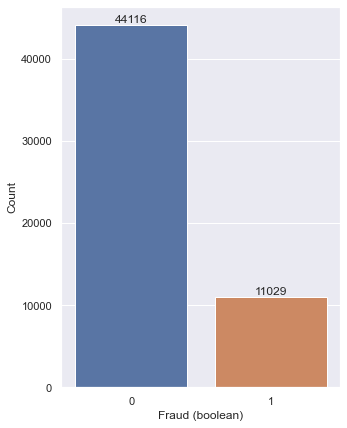

In [69]:
df_combined = pd.concat([fraud_df, sampled_non_fraud_df], axis=0)
new_value_counts = df_combined["fraud_bool"].value_counts()

fig, ax = plt.subplots(figsize = (5, 7))

fraud_ax_new = sns.barplot(new_value_counts.index, new_value_counts.values)
for c in fraud_ax_new.containers:
    fraud_ax_new.bar_label(c, )

plt.xlabel("Fraud (boolean)")
plt.ylabel("Count")

### <u>Feature Engineering</u>


In [70]:
# Create new features if they can provide valuable information for your model.
# Feature selection: Choose the most relevant features and eliminate irrelevant ones.
# Feature scaling/Normalization

##### Encoding Categorical Variables


In [71]:
df_combined.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,88.0,50,0.020925,AA,769,10650.765523,3134.319630,3863.647740,1,6,CA,185,0,BA,1,0,24.0,0,500.0,0,INTERNET,3.888115,windows,0,1.0,0,7
1,1,0.9,0.296286,144.0,50,0.005418,AB,366,534.047319,2670.918292,3124.298166,718,3,CA,259,1,BA,0,0,15.0,0,1500.0,0,INTERNET,31.798819,windows,0,1.0,0,7
2,1,0.9,0.044985,132.0,40,3.108549,AC,870,4048.534263,2893.621498,3159.590679,1,14,CB,177,1,BA,0,1,5.0,0,200.0,0,INTERNET,4.728705,other,0,1.0,0,7
3,1,0.9,0.159511,22.0,50,0.019079,AB,810,3457.064063,4054.908412,3022.261812,1921,6,CA,110,1,BA,0,1,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1.0,0,7
4,1,0.9,0.596414,218.0,50,0.004441,AB,890,5020.341679,2728.237159,3087.670952,1990,2,CA,295,1,BA,1,0,31.0,0,1500.0,0,INTERNET,3.775225,macintosh,1,1.0,0,7


In [72]:
categorical_columns = [
    'income', 'customer_age', 'payment_type',
    'employment_status', 'housing_status',
    'source', 'device_os', 'month'
]

# Perform one-hot encoding for the categorical columns
# Drop first col
df_encoded = pd.get_dummies(df_combined, columns=categorical_columns, drop_first=True)
df_encoded.head()

,fraud_bool,name_email_similarity,current_address_months_count,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,income_0.2,income_0.3,income_0.4,income_0.5,income_0.6000000000000001,income_0.7000000000000001,income_0.8,income_0.9,customer_age_20,customer_age_30,customer_age_40,customer_age_50,customer_age_60,customer_age_70,customer_age_80,customer_age_90,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,1,0.166828,88.0,0.020925,769,10650.765523,3134.319630,3863.647740,1,6,185,0,1,0,24.0,0,500.0,0,3.888115,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0.296286,144.0,0.005418,366,534.047319,2670.918292,3124.298166,718,3,259,1,0,0,15.0,0,1500.0,0,31.798819,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0.044985,132.0,3.108549,870,4048.534263,2893.621498,3159.590679,1,14,177,1,0,1,5.0,0,200.0,0,4.728705,0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0.159511,22.0,0.019079,810,3457.064063,4054.908412,3022.261812,1921,6,110,1,0,1,31.0,1,200.0,0,2.047904,0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0.596414,218.0,0.004441,890,5020.341679,2728.237159,3087.670952,1990,2,295,1,1,0,31.0,0,1500.0,0,3.775225,1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### <u>Data Splitting</u>

We split the undersampled dataset into 3 subsets - train, validation and test.

We make use of stratified data splitting to ensure that within each of the different splits, the ratio of fraud : non-fraud cases are preserved (i.e 1:4 within splits).

In [73]:
from sklearn.model_selection import train_test_split
df_encoded.reset_index(drop=True, inplace=True)

df_encoded_x = df_encoded.drop(columns=["fraud_bool"])
df_encoded_y = df_encoded["fraud_bool"]

In [74]:
df_encoded_x.shape[0]

55145

In [75]:
x_train, x_valid_and_test, y_train, y_valid_and_test = train_test_split(
    df_encoded_x, df_encoded_y, test_size = 0.3, stratify=df_encoded_y, random_state=42
)

In [76]:
train_total_count = len(y_train)
train_fraud_count = y_train.sum()
train_non_fraud_count = train_total_count - train_fraud_count

print(f"train size: {train_total_count}")
print(f"within train, there are {train_fraud_count} fraud instances and {train_non_fraud_count} non-fraud instances, or a {round(train_fraud_count/train_non_fraud_count, 2)} ratio")

print("\n")

print(f"remaining size (validation + test): {x_valid_and_test.shape[0]}")

train size: 38601
within train, there are 7720 fraud instances and 30881 non-fraud instances, or a 0.25 ratio


remaining size (validation + test): 16544


In [77]:
x_valid, x_test, y_valid, y_test = train_test_split(
    x_valid_and_test, y_valid_and_test, test_size = 0.5, stratify=y_valid_and_test, random_state=42
)

In [78]:
valid_total_count = len(y_valid)
valid_fraud_count = y_valid.sum()
valid_non_fraud_count = valid_total_count - valid_fraud_count

print(f"validation size: {valid_total_count}")
print(f"within validation, there are {valid_fraud_count} fraud instances and {valid_non_fraud_count} non-fraud instances, or a {round(valid_fraud_count/valid_non_fraud_count, 2)} ratio")

print("\n")

test_total_count = len(y_test)
test_fraud_count = y_test.sum()
test_non_fraud_count = test_total_count - test_fraud_count

print(f"test size: {test_total_count}")
print(f"within test, there are {test_fraud_count} fraud instances and {test_non_fraud_count} non-fraud instances, or a {round(test_fraud_count/test_non_fraud_count, 2)} ratio")

validation size: 8272
within validation, there are 1655 fraud instances and 6617 non-fraud instances, or a 0.25 ratio


test size: 8272
within test, there are 1654 fraud instances and 6618 non-fraud instances, or a 0.25 ratio


We see that within the train, validation and test splits, the class ratio of 0.25 between fraud : non-fraud instances is preserved.

### <u>Feature Selection</u>

##### Categorical Feature Selection

In determining which categorical features we wish to retain, we have to compare these features to the target `fraud_bool`, itself also a categorical (binary) variable.

Since we are comparing the relationship between 2 categorical variables, we will use Chi-squared test.

In [79]:
from sklearn.feature_selection import chi2

In [80]:
x_train.columns

Index(['name_email_similarity', 'current_address_months_count',
       'days_since_request', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'income_0.2',
       'income_0.3', 'income_0.4', 'income_0.5', 'income_0.6000000000000001',
       'income_0.7000000000000001', 'income_0.8', 'income_0.9',
       'customer_age_20', 'customer_age_30', 'customer_age_40',
       'customer_age_50', 'customer_age_60', 'customer_age_70',
       'customer_age_80', 'customer_age_90', 'payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CC', 'employmen

In [81]:
cat_variables = [
    'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', # originally already binary
    # rest are one-hot encoded from original categorical variables

    # income_0.1,
    'income_0.2','income_0.3', 'income_0.4', 'income_0.5',
    'income_0.6000000000000001', 'income_0.7000000000000001',
    'income_0.8', 'income_0.9',
    

    # 'customer_age_10',
    'customer_age_20', 'customer_age_30', 'customer_age_40','customer_age_50',
    'customer_age_60', 'customer_age_70', 'customer_age_80', 'customer_age_90',

    # 'payment_type_AA',
    'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 
    
    # 'employment_status_CA',
    'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
    'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
    
    # 'housing_status_BA',
    'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
    'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
    
    # 'source_INTERNET',
    'source_TELEAPP',
    
    # 'device_os_linux',
    'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11',

    # 'month_8',
    'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7'
]

In [82]:
x_train_cat_df = x_train[cat_variables]
x_train_cat_df

,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session,income_0.2,income_0.3,income_0.4,income_0.5,income_0.6000000000000001,income_0.7000000000000001,income_0.8,income_0.9,customer_age_20,customer_age_30,customer_age_40,customer_age_50,customer_age_60,customer_age_70,customer_age_80,customer_age_90,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,month_1,month_2,month_3,month_4,month_5,month_6,month_7
4121,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
34998,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
38844,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
54106,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
38175,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34010,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
52573,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
47858,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
6221,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
chi2_coeff, chi2_p_val = chi2(x_train_cat_df, y_train)

In [84]:
chi2_df = pd.DataFrame()
chi2_df["feature"] = cat_variables
chi2_df["chi2_coeff"] = chi2_coeff
chi2_df["chi2_p_val"] = chi2_p_val
chi2_df.sort_values(by="chi2_coeff", ascending=False, inplace=True)
# chi2_df

In [85]:
discarded_categories = []

for row_idx in range(chi2_df.shape[0]):
    feature_name = chi2_df.iloc[row_idx, 0]
    coeff = chi2_df.iloc[row_idx, 1]
    p_val = chi2_df.iloc[row_idx, 2]

    if p_val >= 0.05:
        discarded_categories.append(feature_name)
        print(f"`{feature_name}`: coeff = {round(coeff, 4)}, p-value = {round(p_val, 4)}")

`employment_status_CG`: coeff = 2.7694, p-value = 0.0961
`month_5`: coeff = 2.2476, p-value = 0.1338
`device_os_x11`: coeff = 1.5506, p-value = 0.213
`month_4`: coeff = 0.9066, p-value = 0.341
`payment_type_AD`: coeff = 0.509, p-value = 0.4756
`income_0.8`: coeff = 0.1511, p-value = 0.6974
`housing_status_BG`: coeff = 0.1428, p-value = 0.7055
`payment_type_AB`: coeff = 0.0424, p-value = 0.8368
`payment_type_AE`: coeff = 0.0, p-value = 1.0


These variables have a chi-squared p-value of greater than 0.05. Therefore, at the 5% significance level, there is insufficient evidence to conclude that these variables are not independent from the target variabel `fraud_bool`.

In light of this, we decide not to use these features in training our model.

In [86]:
chi2_df = chi2_df[~chi2_df["feature"].isin(discarded_categories)]
chi2_df

,feature,chi2_coeff,chi2_p_val
41,device_os_windows,2023.506641,0.000000e+00
13,income_0.9,1083.304777,1.404499e-237
18,customer_age_60,719.733442,1.529754e-158
5,keep_alive_session,680.463035,5.299455e-150
3,has_other_cards,608.609341,2.245023e-134
35,housing_status_BE,586.344053,1.563626e-129
40,device_os_other,530.310644,2.417501e-117
17,customer_age_50,522.021902,1.536922e-115
33,housing_status_BC,502.250731,3.077931e-111
14,customer_age_20,501.892162,3.683625e-111


[Text(0.5, 1.0, 'chi2 coefficients of categorical variables (one-hot encoded)')]

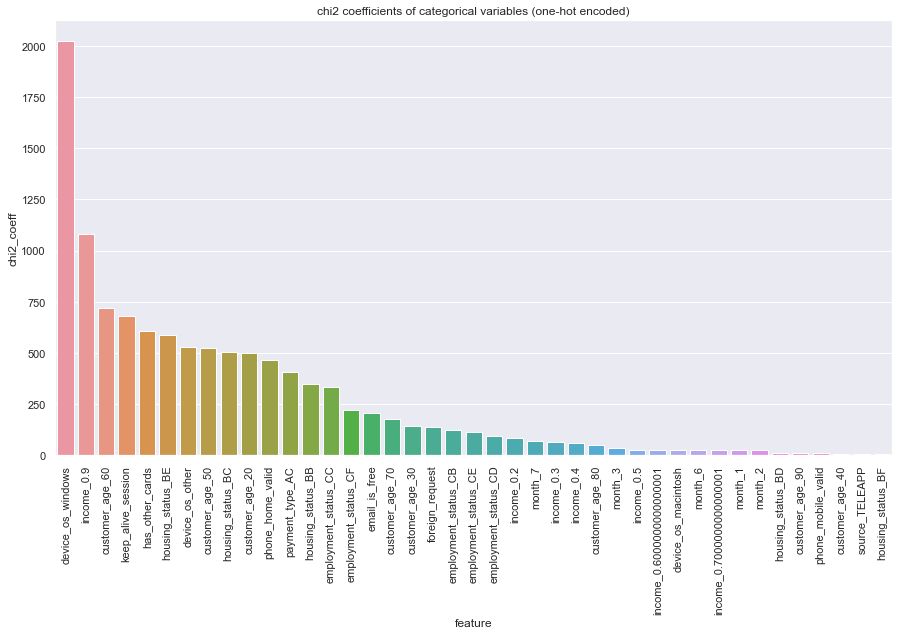

In [87]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(data=chi2_df, x="feature", y="chi2_coeff")
plt.xticks(rotation=90)
ax.set(title="chi2 coefficients of categorical variables (one-hot encoded)")


Retain categorical features wiht `chi2_coeff` > 250

In [88]:
final_cat_variables = chi2_df[chi2_df["chi2_coeff"] > 250]["feature"].unique().tolist()
final_cat_variables

['device_os_windows',
 'income_0.9',
 'customer_age_60',
 'keep_alive_session',
 'has_other_cards',
 'housing_status_BE',
 'device_os_other',
 'customer_age_50',
 'housing_status_BC',
 'customer_age_20',
 'phone_home_valid',
 'payment_type_AC',
 'housing_status_BB',
 'employment_status_CC']

(We will drop unwanted columns only after finding continuous categories to be retained)

##### Continuous Feature Selection

In [89]:
cont_features = np.setdiff1d(x_train.columns, cat_variables).tolist()
cont_features

['bank_branch_count_8w',
 'bank_months_count',
 'credit_risk_score',
 'current_address_months_count',
 'date_of_birth_distinct_emails_4w',
 'days_since_request',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'name_email_similarity',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'velocity_24h',
 'velocity_4w',
 'velocity_6h',
 'zip_count_4w']

In [90]:
x_train[cont_features].head()

,bank_branch_count_8w,bank_months_count,credit_risk_score,current_address_months_count,date_of_birth_distinct_emails_4w,days_since_request,device_distinct_emails_8w,device_fraud_count,name_email_similarity,proposed_credit_limit,session_length_in_minutes,velocity_24h,velocity_4w,velocity_6h,zip_count_4w
4121,1,5.0,28,139.0,7,0.013127,2.0,0,0.247176,200.0,10.011053,5966.825396,5633.503227,9166.677805,1010
34998,10,10.0,136,13.0,12,0.007282,1.0,0,0.087234,500.0,8.955228,4458.980524,5112.078343,6127.348964,1661
38844,1,5.0,126,86.0,19,0.005751,1.0,0,0.104823,500.0,1.193690,3083.429000,5933.685432,8024.777654,1802
54106,10,15.0,76,28.0,14,0.013931,1.0,0,0.197253,200.0,5.728257,5754.126791,4801.358612,9754.414500,5437
38175,1339,28.0,43,59.0,5,0.045653,1.0,0,0.412479,200.0,5.928016,4203.310060,4264.085056,5212.468044,1217


In [91]:
for feature in cont_features:
    print(f"`{feature}`: min = {np.min(x_train[feature])}, max = {np.max(x_train[feature])}")

`bank_branch_count_8w`: min = 0, max = 2266
`bank_months_count`: min = 1.0, max = 32.0
`credit_risk_score`: min = -144, max = 376
`current_address_months_count`: min = 0.0, max = 404.0
`date_of_birth_distinct_emails_4w`: min = 0, max = 36
`days_since_request`: min = 6.224517338352699e-07, max = 75.45579583044902
`device_distinct_emails_8w`: min = 0.0, max = 2.0
`device_fraud_count`: min = 0, max = 0
`name_email_similarity`: min = 9.620504816401644e-05, max = 0.9999904503345308
`proposed_credit_limit`: min = 190.0, max = 2100.0
`session_length_in_minutes`: min = 0.0032623528255633, max = 77.73024155158105
`velocity_24h`: min = 1357.9983493960851, max = 9392.898163952292
`velocity_4w`: min = 2967.3765070338923, max = 6930.6481109163815
`velocity_6h`: min = 64.42257069034851, max = 16545.25413462147
`zip_count_4w`: min = 4, max = 6700


We now scale the continuous variables such that each feature ranges between 0 and 1, using range from training split to prevent train-test leakage.

In [92]:
def scale(min, max, val):
    return (val-min)/(max-min)

for feature in cont_features:
    feature_train_min = np.min(x_train[feature])
    feature_train_max = np.max(x_train[feature])

    for split in [x_train, x_valid, x_test]: # scaling all continuous features for all train, validation, and test splits
        split[feature] = split[feature].apply(lambda x: scale(feature_train_min, feature_train_max, x))

In [93]:
print("checking for min, max and Nan values for each feature in x_train")
print("-------------------")
print("\n")

for feature in cont_features:
    print(f"`{feature}`: ")
    print(f"min = {np.min(x_train[feature])}, max = {np.max(x_train[feature])}, {x_train[feature].isnull().sum()} NaN values")

    print("\n")

checking for min, max and Nan values for each feature in x_train
-------------------


`bank_branch_count_8w`: 
min = 0.0, max = 1.0, 0 NaN values


`bank_months_count`: 
min = 0.0, max = 1.0, 0 NaN values


`credit_risk_score`: 
min = 0.0, max = 1.0, 0 NaN values


`current_address_months_count`: 
min = 0.0, max = 1.0, 0 NaN values


`date_of_birth_distinct_emails_4w`: 
min = 0.0, max = 1.0, 0 NaN values


`days_since_request`: 
min = 0.0, max = 1.0, 0 NaN values


`device_distinct_emails_8w`: 
min = 0.0, max = 1.0, 0 NaN values


`device_fraud_count`: 
min = nan, max = nan, 38601 NaN values


`name_email_similarity`: 
min = 0.0, max = 1.0, 0 NaN values


`proposed_credit_limit`: 
min = 0.0, max = 1.0, 0 NaN values


`session_length_in_minutes`: 
min = 0.0, max = 1.0, 0 NaN values


`velocity_24h`: 
min = 0.0, max = 1.0, 0 NaN values


`velocity_4w`: 
min = 0.0, max = 1.0, 0 NaN values


`velocity_6h`: 
min = 0.0, max = 1.0, 0 NaN values


`zip_count_4w`: 
min = 0.0, max = 1.0, 0 NaN 

We observe that for all features in x_train, each feature has a minimum value of 0 and maximum value of 1, with the exception of the feature `device_fraud_count`, thus confirming that feature scaling was done successfully 

Upon closer inspection, `device_fraud_count` has NaN for all data points in x_train. Since this feature does not provide any relevant information, we will drop it from all 3 splits.

In [94]:
for split in [x_train, x_valid, x_test]:
    split.drop(columns=["device_fraud_count"], inplace=True)

cont_features.remove('device_fraud_count')

We now examine the skewness and kurtosis of each continuous feature

In [95]:
features_to_transform = []

for feature in cont_features:
    skewness = x_train[feature].skew()
    kurtosis = x_train[feature].kurtosis()
    print(f"`{feature}`: skewness = {round(skewness, 4)}, kurtosis = {round(kurtosis, 4)}")
    
    if (np.abs(skewness) > 2) or (np.abs(kurtosis) > 7):
        features_to_transform.append(feature)

`bank_branch_count_8w`: skewness = 2.8736, kurtosis = 7.2242
`bank_months_count`: skewness = 0.557, kurtosis = -1.3388
`credit_risk_score`: skewness = 0.3029, kurtosis = -0.1643
`current_address_months_count`: skewness = 1.3198, kurtosis = 1.2345
`date_of_birth_distinct_emails_4w`: skewness = 0.732, kurtosis = 0.5152
`days_since_request`: skewness = 9.0806, kurtosis = 100.0285
`device_distinct_emails_8w`: skewness = 2.7742, kurtosis = 17.8998
`name_email_similarity`: skewness = 0.1302, kurtosis = -1.306
`proposed_credit_limit`: skewness = 1.1059, kurtosis = -0.2972
`session_length_in_minutes`: skewness = 3.274, kurtosis = 14.044
`velocity_24h`: skewness = 0.3354, kurtosis = -0.3704
`velocity_4w`: skewness = -0.0391, kurtosis = -0.4142
`velocity_6h`: skewness = 0.5944, kurtosis = 0.067
`zip_count_4w`: skewness = 1.424, kurtosis = 2.004


In [96]:
print(features_to_transform)

['bank_branch_count_8w', 'days_since_request', 'device_distinct_emails_8w', 'session_length_in_minutes']


We see that `bank_branch_count_8w`, `days_since_request`, `device_distinct_emails_8w` and `session_length_in_minutes` have absolute skewness >2 and/or absolute kurtosis >7, hence we perform log transformation on them.

In [97]:
for feature in features_to_transform:
    for split in [x_train, x_valid, x_test]: # applying same log transformation across all train, validation, and test splits
        split["log_" + feature] = split[feature].apply(lambda x: np.log(x + 1))
        split.drop(columns=[feature], inplace=True)

    cont_features.append("log_" + feature)
    cont_features.remove(feature)

    log_skewness = x_train["log_" + feature].skew()
    log_kurtosis = x_train["log_" + feature].kurtosis()
    print(f"log_{feature}`: skewness = {round(log_skewness, 4)}, kurtosis = {round(log_kurtosis, 4)}")

log_bank_branch_count_8w`: skewness = 2.6793, kurtosis = 5.9779
log_days_since_request`: skewness = 7.5934, kurtosis = 71.0566
log_device_distinct_emails_8w`: skewness = 1.0391, kurtosis = 20.9811
log_session_length_in_minutes`: skewness = 2.6864, kurtosis = 9.2902


In [98]:
cont_features

['bank_months_count',
 'credit_risk_score',
 'current_address_months_count',
 'date_of_birth_distinct_emails_4w',
 'name_email_similarity',
 'proposed_credit_limit',
 'velocity_24h',
 'velocity_4w',
 'velocity_6h',
 'zip_count_4w',
 'log_bank_branch_count_8w',
 'log_days_since_request',
 'log_device_distinct_emails_8w',
 'log_session_length_in_minutes']

We use the ANOVA-F test to examine the relationship between the continuous variables in x_train and the binary target variable `fraud_bool`. 

In [99]:
from sklearn.feature_selection import f_classif

f_classif_scores = f_classif(x_train[cont_features], y_train)

In [100]:
f_classif_scores

(array([6.68816309e+00, 2.55313188e+03, 7.38134647e+02, 1.06043860e+03,
        7.46708649e+02, 2.31736724e+03, 8.23820972e+01, 6.71880272e+01,
        1.58015540e+02, 2.57292237e+01, 8.80024612e+01, 5.34462462e-02,
        4.63107040e+02, 3.36383809e+01]),
 array([9.70914245e-003, 0.00000000e+000, 5.02110227e-161, 1.69720479e-229,
        7.44147631e-163, 0.00000000e+000, 1.17322579e-019, 2.54342165e-016,
        3.61553688e-036, 3.94649976e-007, 6.88084520e-021, 8.17172742e-001,
        4.04412210e-102, 6.68868340e-009]))

In [101]:
f_classif_df = pd.DataFrame()
f_classif_df["feature"] = cont_features
f_classif_df["score"] = f_classif_scores[0]
f_classif_df["pVal"] = f_classif_scores[1]

In [102]:
f_classif_df.sort_values(by="score", ascending=False, inplace=True)

In [103]:
f_classif_df

,feature,score,pVal
1,credit_risk_score,2553.131878,0.000000e+00
5,proposed_credit_limit,2317.367240,0.000000e+00
3,date_of_birth_distinct_emails_4w,1060.438604,1.697205e-229
4,name_email_similarity,746.708649,7.441476e-163
2,current_address_months_count,738.134647,5.021102e-161
12,log_device_distinct_emails_8w,463.107040,4.044122e-102
8,velocity_6h,158.015540,3.615537e-36
10,log_bank_branch_count_8w,88.002461,6.880845e-21
6,velocity_24h,82.382097,1.173226e-19
7,velocity_4w,67.188027,2.543422e-16


In [104]:
discarded_cont_features = []

for row_idx in range(f_classif_df.shape[0]):
    feature_name = f_classif_df.iloc[row_idx, 0]
    score = f_classif_df.iloc[row_idx, 1]
    pVal = f_classif_df.iloc[row_idx, 2]

    if pVal >= 0.05:
        discarded_cont_features.append(feature_name)
        print(f"`{feature_name}`: ANOVA-F test score = {round(score, 4)}, p-value = {round(pVal, 4)}")

`log_days_since_request`: ANOVA-F test score = 0.0534, p-value = 0.8172


As before, since we observe that the p-value for the ANOVA-F test for the feature `log_days_since_request` is greater than 0.05, we drop them from our analysis.

In [105]:
f_classif_df = f_classif_df[~f_classif_df["feature"].isin(discarded_cont_features)]

[Text(0.5, 1.0, 'ANOVA-F test scores of continuous variables')]

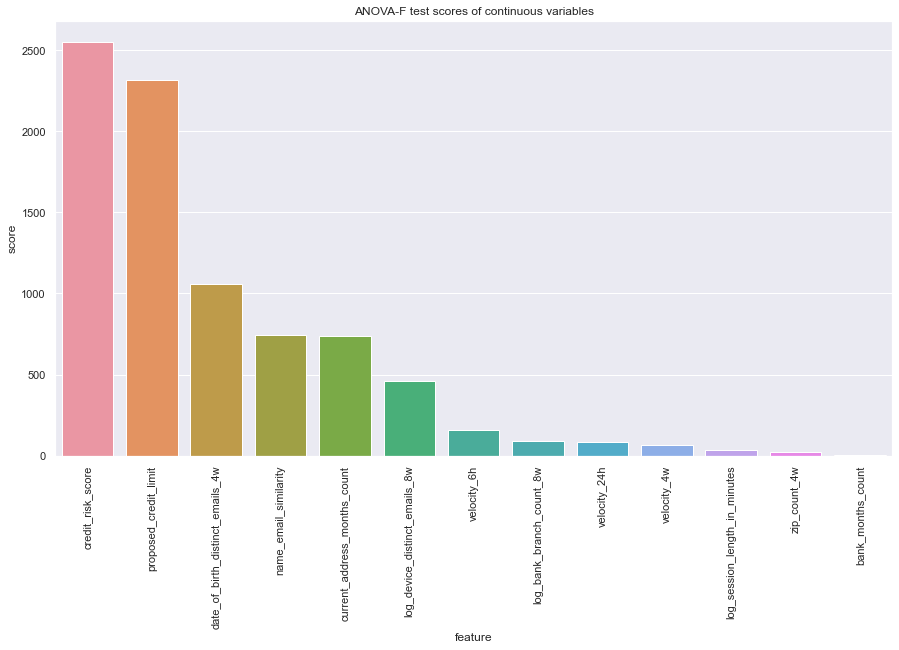

In [106]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(data=f_classif_df, x="feature", y="score")
plt.xticks(rotation=90)
ax.set(title="ANOVA-F test scores of continuous variables")

In [107]:
final_cont_variables = f_classif_df[f_classif_df["score"] > 450]["feature"].unique().tolist()
final_cont_variables

['credit_risk_score',
 'proposed_credit_limit',
 'date_of_birth_distinct_emails_4w',
 'name_email_similarity',
 'current_address_months_count',
 'log_device_distinct_emails_8w']

From the ANOVA-F test values, we decide to retain the top 6 continuous features as listed above, because these features have relatively higher ANOVA-F test scores relative to the other features, and that there appears to be a large drop-off in scores thereafter.

Things to do to standardise train, valid, test splits:
- drop categorical features across all 3
- scale continuous features across all 3 **[done]**
- log certain continuous features across all 3 **[done]**
- drop continuous features across all 3

### <u>Dropping unwanted features from x_train, x_valid, x_test and retaining desired features</u>

In [108]:
final_retained_variables_all = final_cat_variables + final_cont_variables
final_retained_variables_all

['device_os_windows',
 'income_0.9',
 'customer_age_60',
 'keep_alive_session',
 'has_other_cards',
 'housing_status_BE',
 'device_os_other',
 'customer_age_50',
 'housing_status_BC',
 'customer_age_20',
 'phone_home_valid',
 'payment_type_AC',
 'housing_status_BB',
 'employment_status_CC',
 'credit_risk_score',
 'proposed_credit_limit',
 'date_of_birth_distinct_emails_4w',
 'name_email_similarity',
 'current_address_months_count',
 'log_device_distinct_emails_8w']

In [109]:
x_train = x_train[final_retained_variables_all]
x_valid = x_valid[final_retained_variables_all]
x_test = x_test[final_retained_variables_all]

--------------------------------------

# **Exporting Splits for Training, Validation & Testing Phases**

Cleaning up feature dataframes for the 3 splits and exporting

In [ ]:
x_train.reset_index(drop=True, inplace=True)
x_valid.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [ ]:
# x_train

In [ ]:
x_train.to_csv("x_train.csv", index=False)
x_valid.to_csv("x_valid.csv", index=False)
x_test.to_csv("x_test.csv", index=False)

Converting target values for the 3 splits into dataframes and exporting

In [ ]:
y_train_df = pd.DataFrame({"fraud_bool" : y_train}).reset_index(drop=True)
y_valid_df = pd.DataFrame({"fraud_bool" : y_valid}).reset_index(drop=True)
y_test_df = pd.DataFrame({"fraud_bool" : y_test}).reset_index(drop=True)

In [ ]:
y_train_df.to_csv("y_train.csv", index=False)
y_valid_df.to_csv("y_valid.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)